In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
with open('etf.log', "r") as f:
    data =f.readlines()
    temp = ['Iter','Current','Schedule','SW','HW']
    data_formatted = []
    for row in data:
        if 'Iter' in row:
            data_formatted.append(temp)
            temp = []
            temp.append(int(re.findall('[0-9]+', row)[0]))
        else:
            temp.append(np.float64(row.split()[-1][6:]))

data_etf = pd.DataFrame(data_formatted[1:])
data_etf.columns = data_formatted[0]

data_etf['kernel_delay'] = data_etf['SW'] - data_etf['Schedule']

data_etf['MAC_delay'] = data_etf['HW'] - data_etf['Schedule']

In [3]:
with open('without_etf.log', "r") as f:
    data =f.readlines()
    temp = ['Iter','Schedule','SW','HW']
    data_formatted = []
    for row in data:
        if 'Iter' in row:
            data_formatted.append(temp)
            temp = []
            temp.append(int(re.findall('[0-9]+', row)[0]))
        else:
            temp.append(np.float64(row.split()[-1][6:]))

data_normal = pd.DataFrame(data_formatted[1:])
data_normal.columns = data_formatted[0]

data_normal['kernel_delay'] = data_normal['SW'] - data_normal['Schedule']

data_normal['MAC_delay'] = data_normal['HW'] - data_normal['Schedule']

In [4]:
data_etf['MAC_delay']

0       0.043883
1       0.043881
2       0.043877
3       0.043884
4       0.043881
          ...   
6306    0.044382
6307    0.945332
6308    0.044382
6309    0.044402
6310    0.044383
Name: MAC_delay, Length: 6311, dtype: float64

## Compare delay HW sending - Schedule time

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='MAC_delay'>

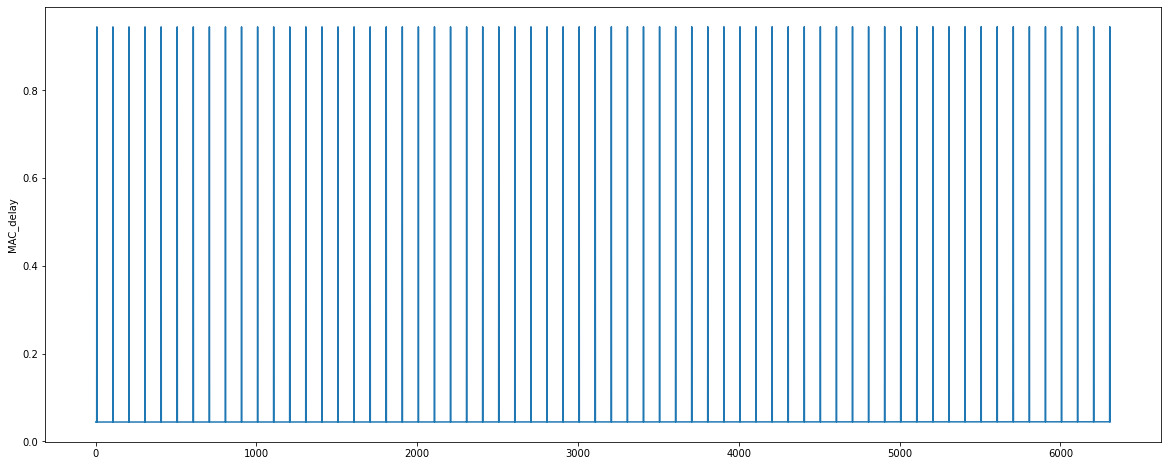

In [5]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_etf)),data_etf['MAC_delay'])

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Pkt Seq')

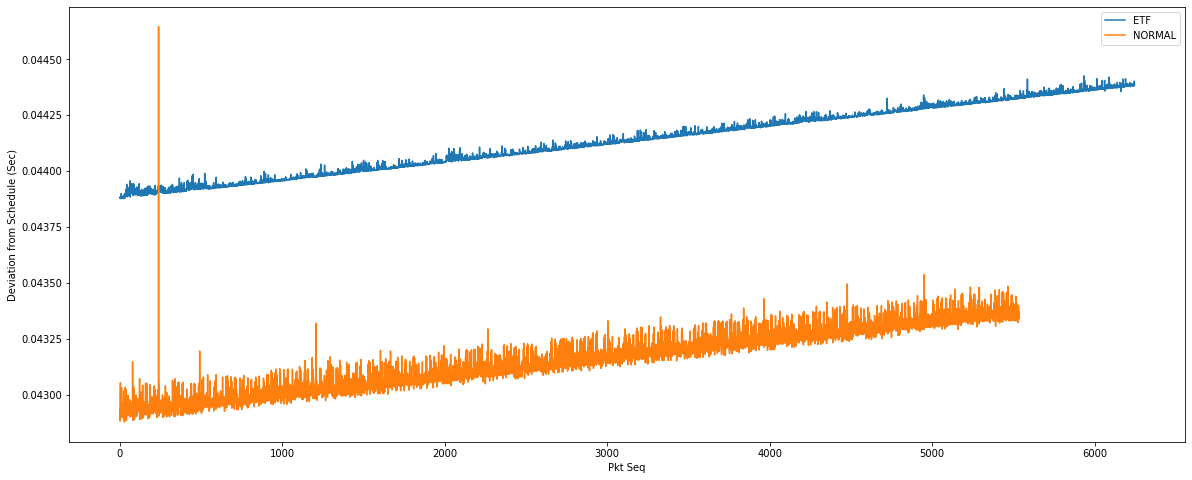

In [6]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_etf['MAC_delay'][data_etf['MAC_delay'] < 0.8])),data_etf['MAC_delay'][data_etf['MAC_delay'] < 0.8], label='ETF')
sns.lineplot(range(len(data_normal)),data_normal['MAC_delay'], label='NORMAL')
plt.ylabel('Deviation from Schedule (Sec)')
plt.xlabel('Pkt Seq')

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Pkt Seq')

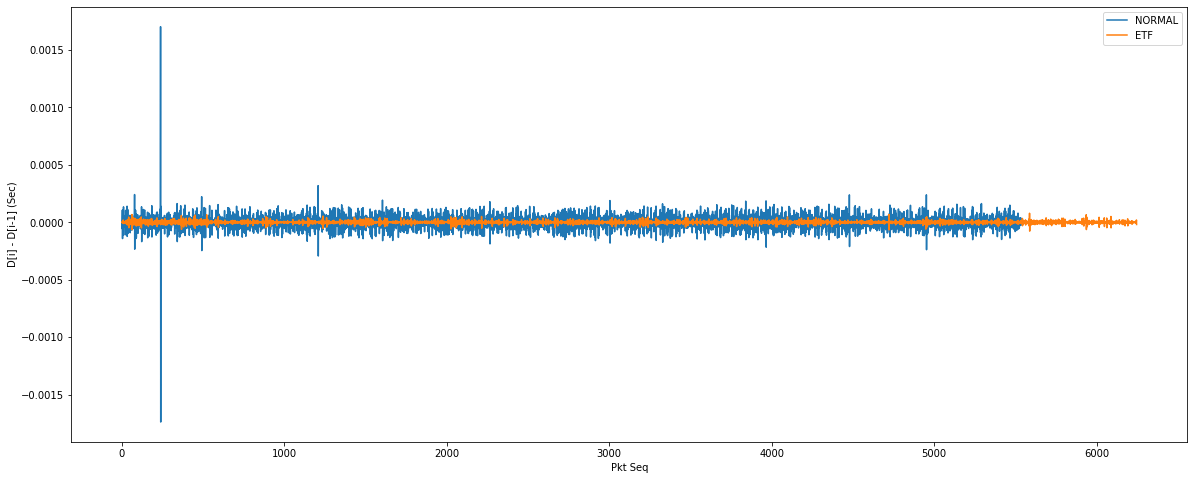

In [7]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_normal)),data_normal['MAC_delay'].diff(),label='NORMAL')
sns.lineplot(range(len(data_etf['MAC_delay'][data_etf['MAC_delay'] < 0.8])),
             data_etf['MAC_delay'][data_etf['MAC_delay'] < 0.8].diff(),label='ETF')
plt.ylabel('D[i] - D[i-1] (Sec)')
plt.xlabel('Pkt Seq')

## Update -- May 21

In [8]:
with open('etf_new.log', "r") as f:
    data =f.readlines()
    temp = ['Iter','Current','Schedule','SW','HW']
    data_formatted = []
    for row in data:
        if 'Iter' in row:
            data_formatted.append(temp)
            temp = []
            temp.append(int(re.findall('[0-9]+', row)[0]))
        else:
            temp.append(np.float64(row.split()[-1][6:]))

data_new = pd.DataFrame(data_formatted[1:])
data_new.columns = data_formatted[0]

data_new['kernel_delay'] = data_new['SW'] - data_new['Schedule']
data_new['MAC_delay'] = data_new['HW'] - data_new['Schedule']

In [9]:
data_new

,Iter,Current,Schedule,SW,HW,kernel_delay,MAC_delay
0,0,4527.404642,4528.414518,4528.414490,4528.414518,-0.000028,4.719996e-07
1,1,4528.414572,4528.424518,4528.424494,4528.424518,-0.000024,4.719996e-07
2,2,4528.424571,4528.434518,4528.434494,4528.434518,-0.000024,4.720005e-07
3,3,4528.434571,4528.444518,4528.444486,4528.444518,-0.000032,4.880003e-07
4,4,4528.444570,4528.454518,4528.454489,4528.454518,-0.000029,4.719996e-07
...,...,...,...,...,...,...,...
7585,7585,4604.254577,4604.264518,4604.264120,4604.264746,-0.000398,2.283440e-04
7586,7586,4604.264576,4604.274518,4604.274120,4604.274746,-0.000398,2.283120e-04
7587,7587,4604.274576,4604.284518,4604.284119,4604.284746,-0.000399,2.283600e-04
7588,7588,4604.284576,4604.294518,4604.294120,4604.294748,-0.000398,2.295440e-04


/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='MAC_delay'>

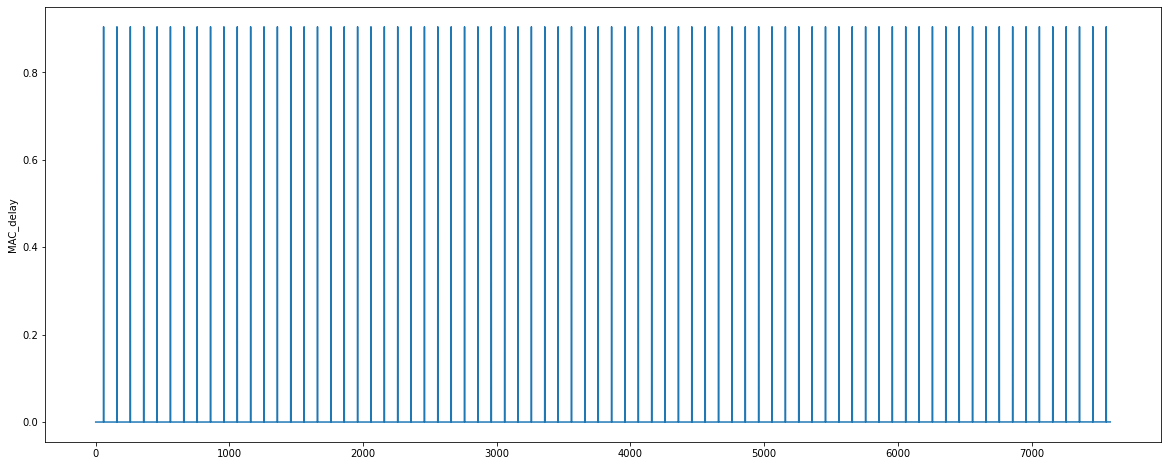

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_new)),data_new['MAC_delay'])

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='MAC_delay'>

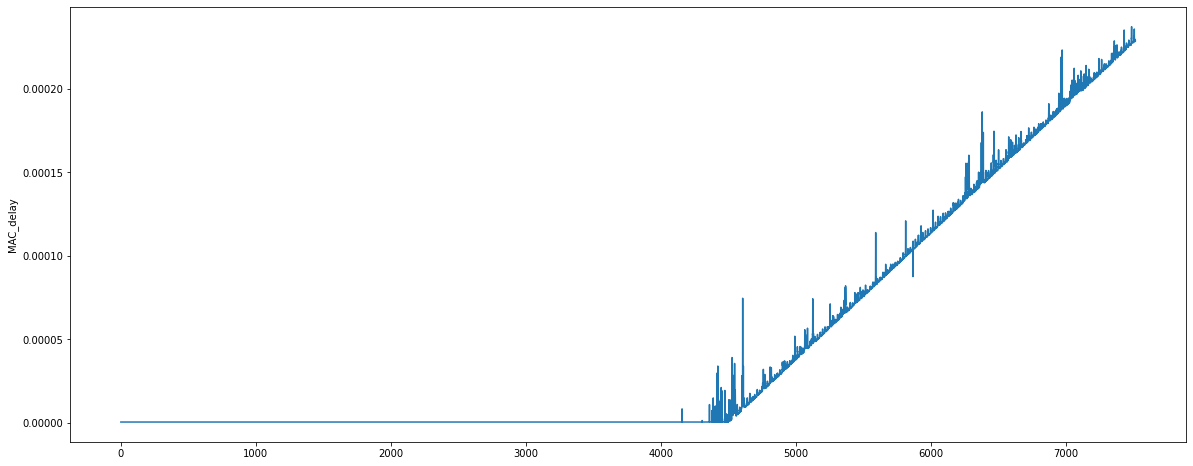

In [11]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_new['MAC_delay'][data_new['MAC_delay'] < 0.8])),data_new['MAC_delay'][data_new['MAC_delay'] < 0.8])

## Update -- May 23

In [20]:
with open('etf_may23.log', "r") as f:
    data =f.readlines()
    temp = ['Iter','Current','Schedule','SW','HW']
    data_formatted = []
    for row in data:
        if 'Iter' in row:
            data_formatted.append(temp)
            temp = []
            temp.append(int(re.findall('[0-9]+', row)[0]))
        else:
            temp.append(np.float64(row.split()[-1][6:]))

data_new = pd.DataFrame(data_formatted[1:])
data_new.columns = data_formatted[0]

data_new['kernel_delay'] = data_new['SW'] - data_new['Schedule']
data_new['MAC_delay'] = data_new['HW'] - data_new['Schedule']

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='MAC_delay'>

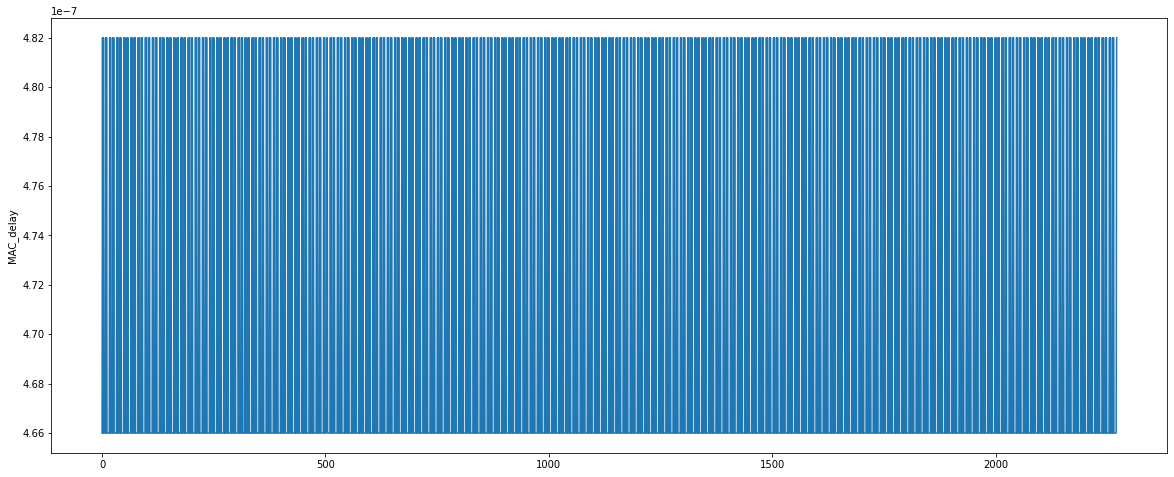

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_new)),data_new['MAC_delay'])

In [24]:
np.max(data_new['MAC_delay']) - np.min(data_new['MAC_delay'])

1.60016497829929e-08

## Compare testing result in different frequency

In [17]:
with open('cyclic_1ms.log', "r") as f:
    data =f.readlines()
    data_1ms = []
    for row in data:
        if 'HW' in row:
            data_1ms.append(np.float64(row.split()[-1][6:]))
    data_1ms = np.diff(data_1ms) - 1e-3

In [18]:
with open('cyclic_100us.log', "r") as f:
    data =f.readlines()
    data_100us = []
    for row in data:
        if 'HW' in row:
            data_100us.append(np.float64(row.split()[-1][6:]))
    data_100us = np.diff(data_100us) - 1e-4

In [19]:
with open('cyclic_10us.log', "r") as f:
    data =f.readlines()
    data_10us = []
    for row in data:
        if 'HW' in row:
            data_10us.append(np.float64(row.split()[-1][6:]))
    data_10us = np.diff(data_10us) - 1e-5

In [21]:
with open('cyclic_1us.log', "r") as f:
    data =f.readlines()
    data_1us = []
    for row in data:
        if 'HW' in row:
            data_1us.append(np.float64(row.split()[-1][6:]))
    data_1us = np.diff(data_1us) - 1e-6

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

(-0.001, 0.02)

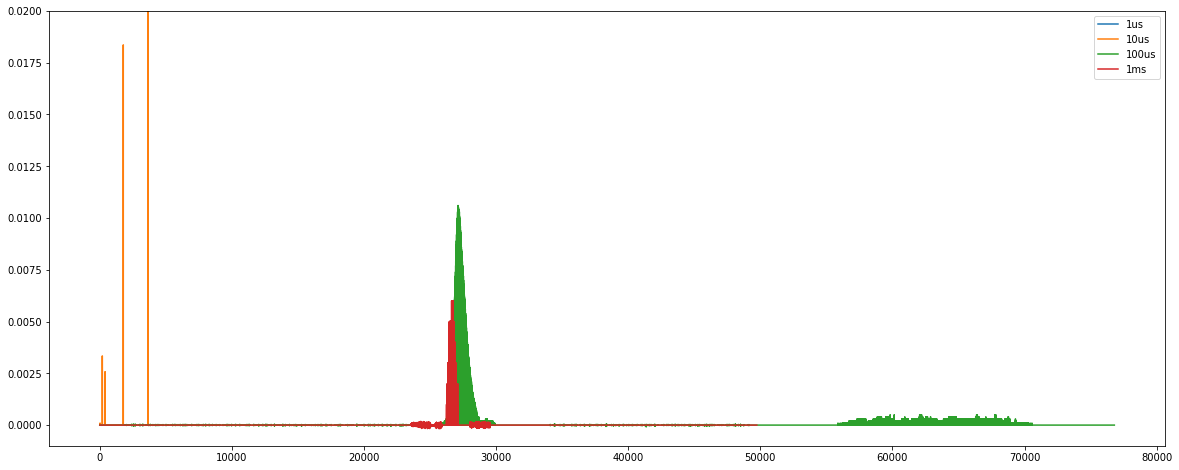

In [30]:

plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_1us)),data_1us, label='1us')
sns.lineplot(range(len(data_10us)),data_10us,label='10us')
sns.lineplot(range(len(data_100us)),data_100us,label='100us')
sns.lineplot(range(len(data_1ms)),data_1ms,label='1ms')
plt.ylim(-0.001,0.02)

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

(-0.0001, 0.0001)

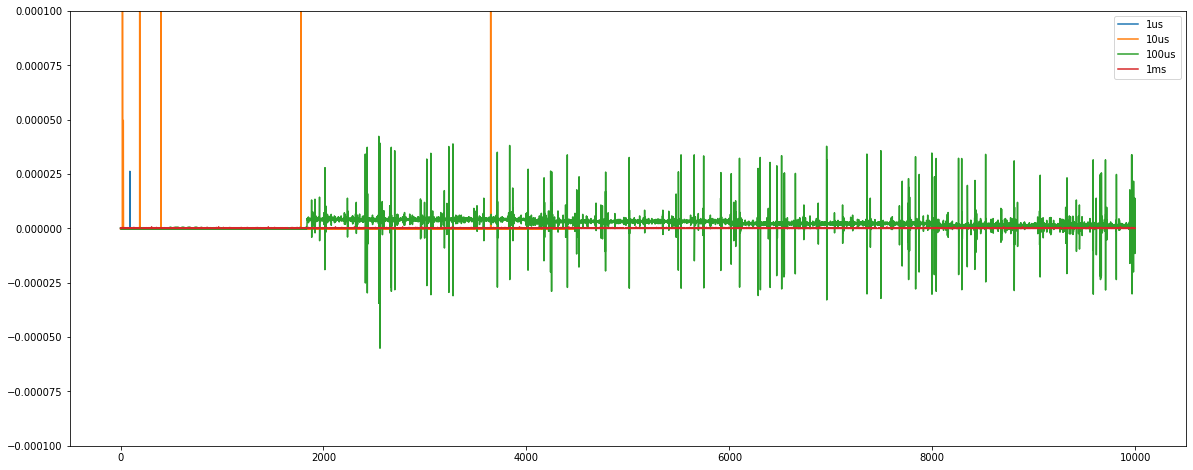

In [37]:
plt.figure(figsize=(20,8))
sns.lineplot(range(len(data_1us[:10000])),data_1us[:10000], label='1us')
sns.lineplot(range(len(data_10us[:10000])),data_10us[:10000],label='10us')
sns.lineplot(range(10000),data_100us[:10000],label='100us')
sns.lineplot(range(10000),data_1ms[:10000],label='1ms')
plt.ylim(-0.0001,0.0001)

/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chuanyu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

(-5e-07, 5e-07)

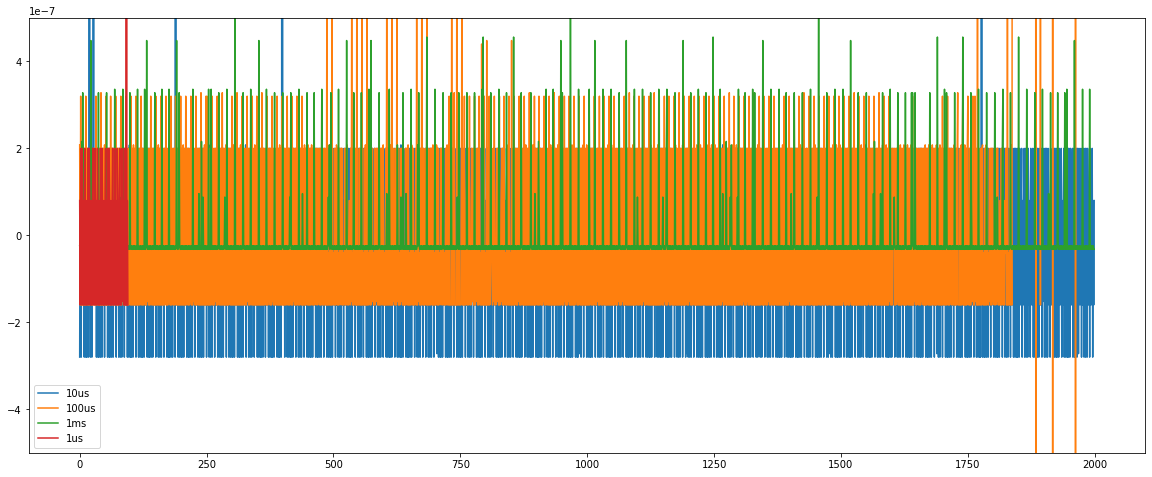

In [41]:
plt.figure(figsize=(20,8))

sns.lineplot(range(len(data_10us[:2000])),data_10us[:2000],label='10us')
sns.lineplot(range(2000),data_100us[:2000],label='100us')
sns.lineplot(range(2000),data_1ms[:2000],label='1ms')
sns.lineplot(range(len(data_1us[:2000])),data_1us[:2000], label='1us')
plt.ylim(-0.0000005,0.0000005)

In [48]:
np.max(data_1us[:2000]) - np.min(data_1us[:2000])

2.640000093379058e-05

In [50]:
np.max(data_10us[:2000]) - np.min(data_10us[:2000])

0.01836020800146798

In [51]:
np.max(data_100us[:2000]) - np.min(data_100us[:2000])

2.004000089073088e-05

In [52]:
np.max(data_1ms[:2000]) - np.min(data_1ms[:2000])

7.280013960553333e-07